# Demo of yt using AMReX Data

We'll use a dataset from merging white dwarfs

In [1]:
plotfile = "smallplt10598"

In [2]:
import yt

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image


In [3]:
yt.__version__

'3.6.dev0'

In [4]:
ds = yt.load(plotfile)

yt : [INFO     ] 2019-11-08 10:30:21,422 Parameters: current_time              = 117.000954758484
yt : [INFO     ] 2019-11-08 10:30:21,424 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-11-08 10:30:21,425 Parameters: domain_left_edge          = [-5.12e+09 -5.12e+09 -5.12e+09]
yt : [INFO     ] 2019-11-08 10:30:21,426 Parameters: domain_right_edge         = [5.12e+09 5.12e+09 5.12e+09]


In [5]:
ds.field_list

[('boxlib', 'Temp'), ('boxlib', 'density')]

In [6]:
for k in sorted(ds.parameters.keys()):
    print("  {:32}: {}".format(k, ds.parameters[k]))

  +x                              : outflow
  +y                              : outflow
  +z                              : outflow
  -x                              : outflow
  -y                              : outflow
  -z                              : outflow
  BoxLib   git hash               : 3bccd760d7c027b9ce7533d08fd8c549dc314c9a
  Castro   git hash               : 3b3824ed64fb7f94134718f3a0b5d7cb8c307573
  DistributionMapping.efficiency  : 0.9
  DistributionMapping.strategy    : KNAPSACK
  EOSType                         : -1
  HydroMethod                     : Castro
  Time                            : 1.0
  amr.blocking_factor             : 16
  amr.check_file                  : chk
  amr.check_int                   : -1
  amr.check_per                   : 100.0
  amr.checkpoint_files_output     : 1
  amr.compute_new_dt_on_regrid    : 1
  amr.data_log                    : grid_diag.out star_diag.out species_diag.out amr_diag.out bndy_diag.out
  amr.derive_plot_vars         

Create a region with all the data

In [7]:
dd = ds.all_data()

find the extrema

In [8]:
rx = dd.quantities.extrema("density")
rx

YTArray([2.81211734e-03, 1.75410180e+07]) g/cm**3

explore a region around the extrema

In [9]:
x, y, z = dd.argmax("density")
print(x, y, z)

570000000.0 cm -590000000.0 cm -10000000.0 cm


slice through the max density

yt : [INFO     ] 2019-11-08 10:30:27,984 xlim = -4550000000.000000 5690000000.000000
yt : [INFO     ] 2019-11-08 10:30:27,985 ylim = -5710000000.000000 4530000000.000000
yt : [INFO     ] 2019-11-08 10:30:27,986 xlim = -4550000000.000000 5690000000.000000
yt : [INFO     ] 2019-11-08 10:30:27,987 ylim = -5710000000.000000 4530000000.000000
yt : [INFO     ] 2019-11-08 10:30:28,000 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



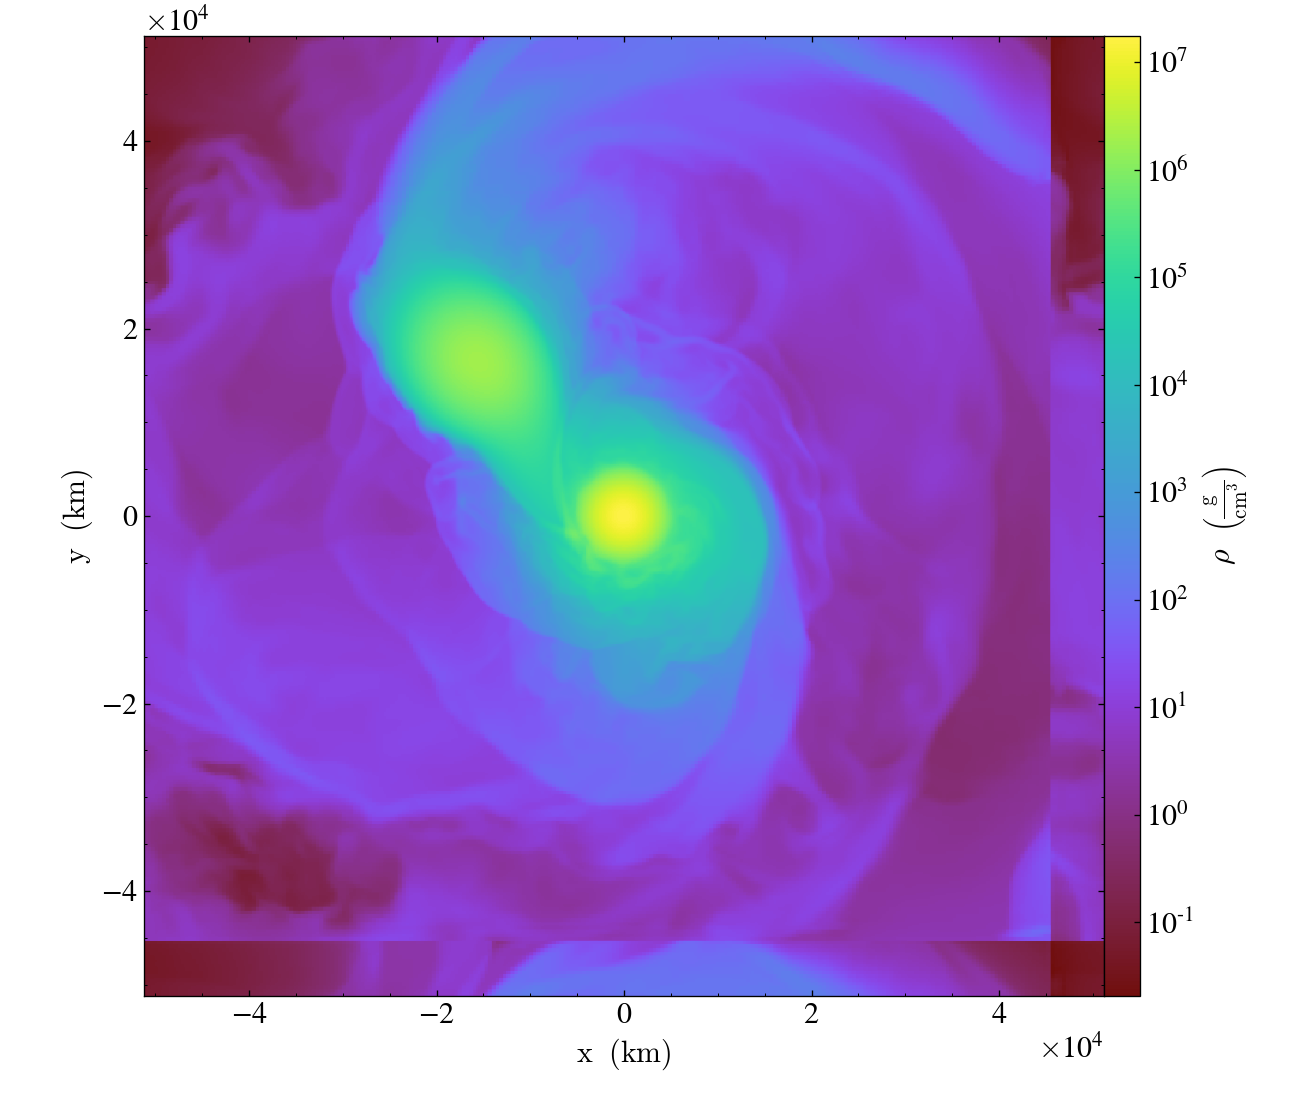

In [10]:
yt.SlicePlot(ds, "z", "density", center=[x, y, z], )

line through the data

In [12]:
ray = ds.ortho_ray(0, [y, z])

this is unsorted

In [15]:
x = ray["x"]
ix = np.argsort(x)

In [16]:
dens = ray["density"]

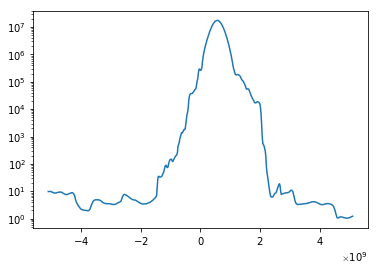

In [19]:
plt.semilogy(x[ix], dens[ix])

volume rendering

In [22]:
from yt.visualization.volume_rendering.api import Scene, VolumeSource

In [29]:
im, sc = yt.volume_render(ds, field="density", lens_type="perspective")

yt : [INFO     ] 2019-11-08 11:57:02,753 Rendering scene (Can take a while).
yt : [INFO     ] 2019-11-08 11:57:02,756 Creating volume
yt : [INFO     ] 2019-11-08 11:57:08,079 Creating transfer function
yt : [INFO     ] 2019-11-08 11:57:08,081 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2019-11-08 11:57:25,293 Rendering scene (Can take a while).
yt : [INFO     ] 2019-11-08 11:57:42,707 Saving render smallplt10598_Render_density.png


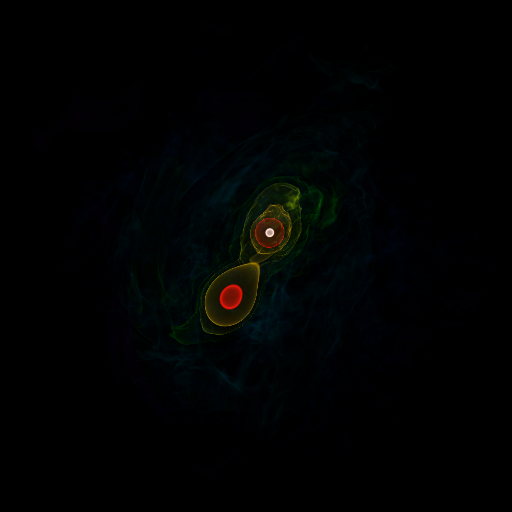

In [30]:
Image("smallplt10598_Render_density.png")